In [10]:
import pandas as pd

df = pd.read_csv("clean_data.csv")
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv('clean_data.csv')
print(data.head())


   Unnamed: 0  Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           0      1     1  2010-02-05      24924.50      False        42.31   
1           1      1     2  2010-02-05      50605.27      False        42.31   
2           2      1     3  2010-02-05      13740.12      False        42.31   
3           3      1     4  2010-02-05      39954.04      False        42.31   
4           4      1     5  2010-02-05      32229.38      False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  ...  Unemployment  Type    Size  \
0       2.572        0.0        0.0  ...         8.106     A  151315   
1       2.572        0.0        0.0  ...         8.106     A  151315   
2       2.572        0.0        0.0  ...         8.106     A  151315   
3       2.572        0.0        0.0  ...         8.106     A  151315   
4       2.572        0.0        0.0  ...         8.106     A  151315   

   Super_Bowl  Labor_Day Thanksgiving  Christmas  week  month  year  
0       False   

In [13]:
X = data[['Unemployment']]
X = (X - X.mean()) / X.std()  # 标准化数据


In [14]:
n_components = 1  # 选择主成分数量
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


In [15]:
data['PCA_Component'] = X_pca
mean_sales_by_component = data.groupby('PCA_Component')['Weekly_Sales'].mean()


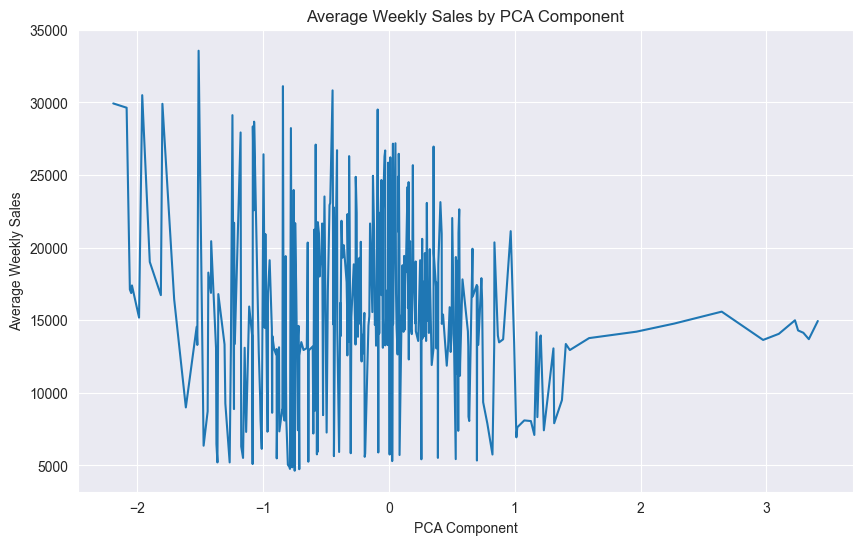

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(mean_sales_by_component.index, mean_sales_by_component.values)
plt.xlabel('PCA Component')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by PCA Component')
plt.grid(True)
plt.show()


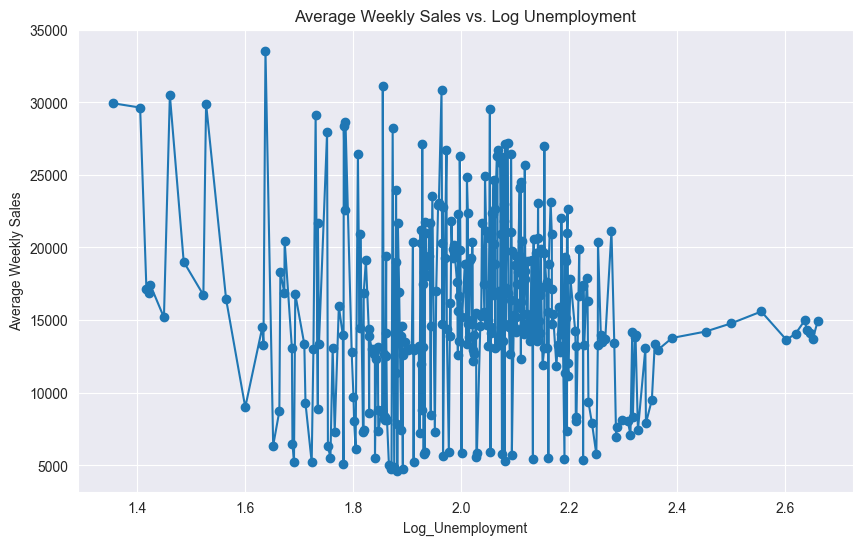

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 'clean_data.csv' 文件
data = pd.read_csv('clean_data.csv')

# 对 'Unemployment' 特征进行对数转换
data['Log_Unemployment'] = np.log(data['Unemployment'])

# 按 'Log_Unemployment' 分组计算 'Weekly_Sales' 的平均值
avg_weekly_sales = data.groupby('Log_Unemployment')['Weekly_Sales'].mean()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(avg_weekly_sales.index, avg_weekly_sales.values, marker='o', linestyle='-')
plt.xlabel('Log_Unemployment')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales vs. Log Unemployment')
plt.grid(True)
plt.show()


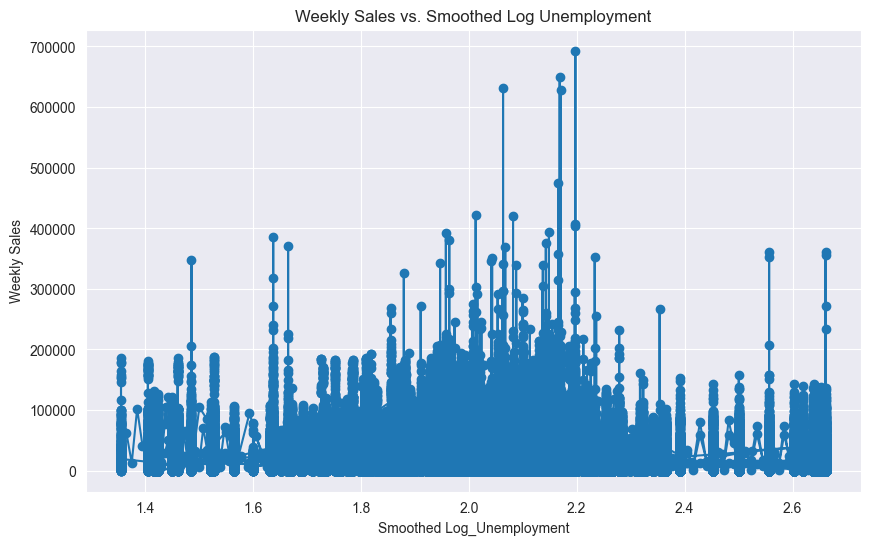

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 'clean_data.csv' 文件
data = pd.read_csv('clean_data.csv')

# 对 'Unemployment' 特征进行对数转换
data['Log_Unemployment'] = np.log(data['Unemployment'])

# 定义移动平均窗口大小
window_size = 5  # 可根据需要调整窗口大小

# 计算移动平均
data['Smoothed_Log_Unemployment'] = data['Log_Unemployment'].rolling(window=window_size).mean()

# 去掉 NaN 值
data = data.dropna()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(data['Smoothed_Log_Unemployment'], data['Weekly_Sales'], marker='o', linestyle='-')
plt.xlabel('Smoothed Log_Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Smoothed Log Unemployment')
plt.grid(True)
plt.show()


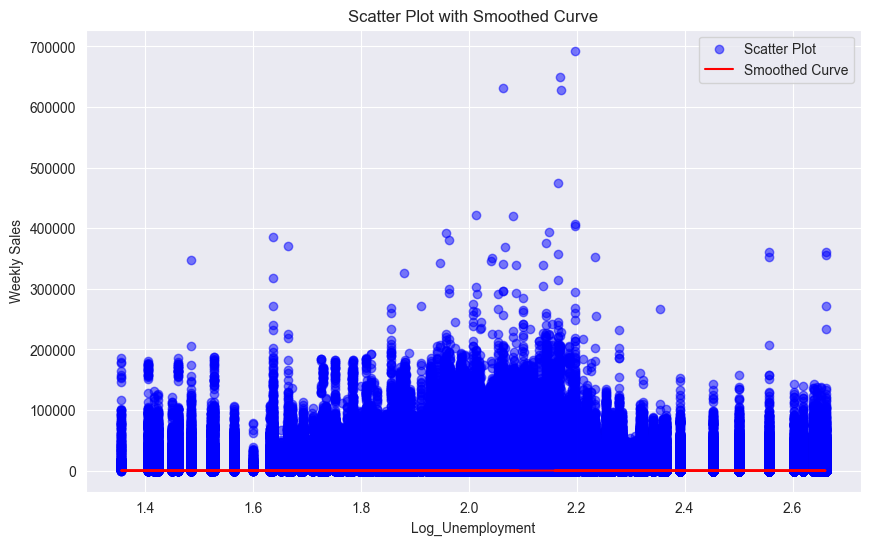

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 'clean_data.csv' 文件
data = pd.read_csv('clean_data.csv')

# 对 'Unemployment' 特征进行对数转换
data['Log_Unemployment'] = np.log(data['Unemployment'])

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(data['Log_Unemployment'], data['Weekly_Sales'], alpha=0.5, label='Scatter Plot', color='blue')

# 计算平滑曲线
smoothed_unemployment = data['Log_Unemployment'].rolling(window=10).mean()
plt.plot(data['Log_Unemployment'], smoothed_unemployment, label='Smoothed Curve', color='red')

plt.xlabel('Log_Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot with Smoothed Curve')
plt.legend()
plt.grid(True)
plt.show()


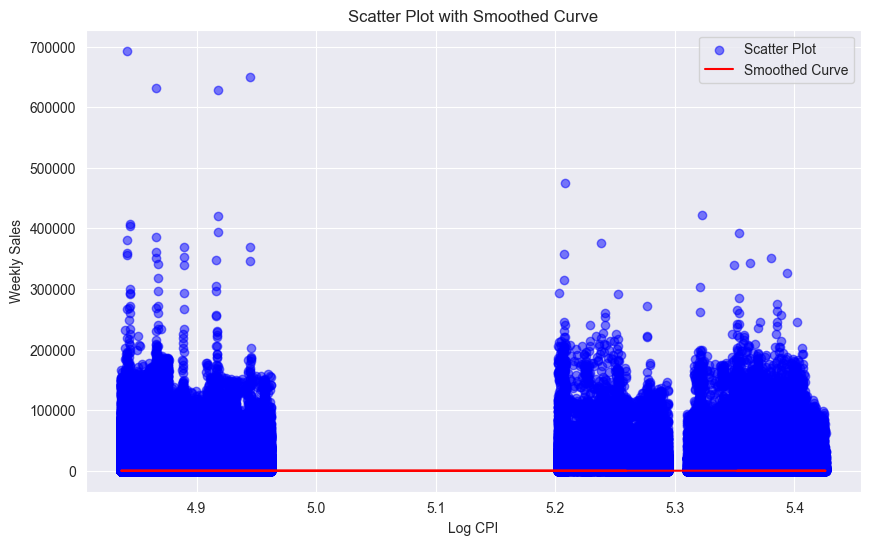

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 'clean_data.csv' 文件
data = pd.read_csv('clean_data.csv')

# 对 'Unemployment' 特征进行对数转换
data['Log_CPI'] = np.log(data['CPI'])

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(data['Log_CPI'], data['Weekly_Sales'], alpha=0.5, label='Scatter Plot', color='blue')

# 计算平滑曲线
smoothed_unemployment = data['Log_CPI'].rolling(window=10).mean()
plt.plot(data['Log_CPI'], smoothed_unemployment, label='Smoothed Curve', color='red')

plt.xlabel('Log CPI')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot with Smoothed Curve')
plt.legend()
plt.grid(True)
plt.show()

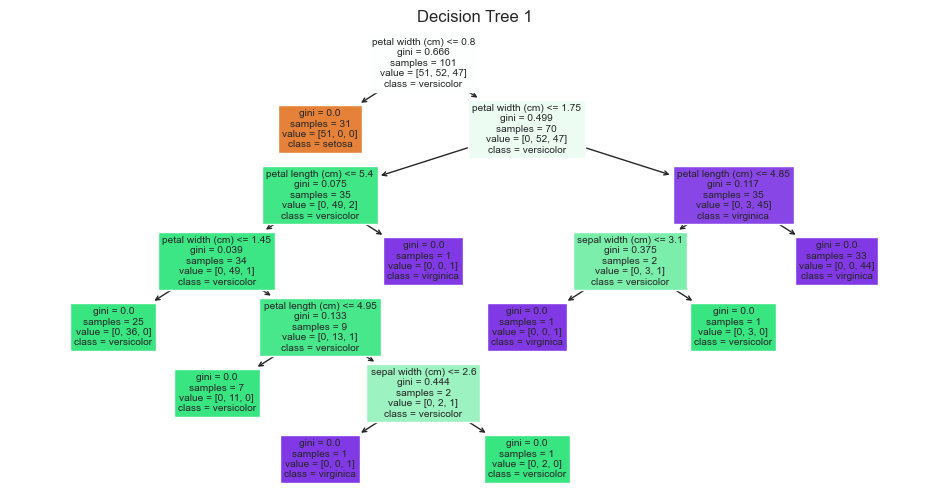

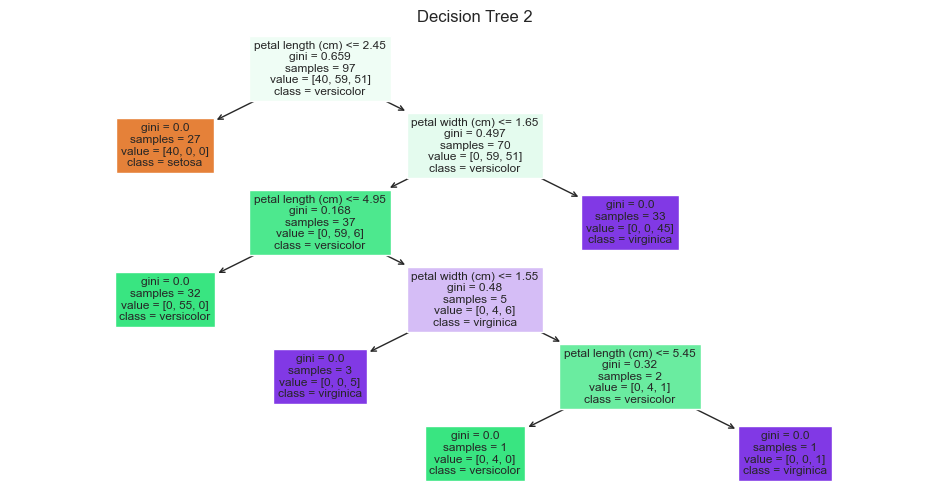

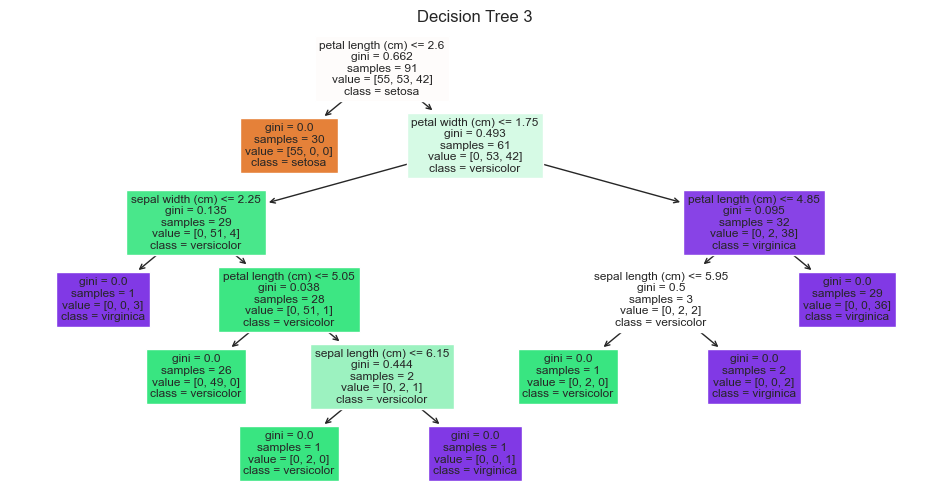

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# 加载典型数据集，例如鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 创建一个包含50棵树的随机森林模型
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# 拟合随机森林模型
rf_classifier.fit(X, y)

# 随机可视化随机森林中的三棵树
for i in range(3):
    plt.figure(figsize=(12, 6))
    plot_tree(rf_classifier.estimators_[i], filled=True, feature_names=data.feature_names, class_names=data.target_names)
    plt.title(f"Decision Tree {i+1}")
    plt.show()


In [12]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("IrisRandomForest").getOrCreate()

# Load the Iris dataset from sklearn
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Create a Pandas DataFrame
import pandas as pd
iris_df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

# Convert it to a Spark DataFrame
iris_spark_df = spark.createDataFrame(iris_df)

# Create a feature vector
feature_cols = data.feature_names
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
iris_spark_df = vector_assembler.transform(iris_spark_df)

# Split the dataset into training and testing sets
train_data, test_data = iris_spark_df.randomSplit([0.8, 0.2], seed=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(labelCol="target", featuresCol="features", numTrees=50, seed=42)

# Fit the RandomForest model
rf_model = rf_classifier.fit(train_data)

# Extract and visualize the first 3 trees
for i in range(3):
    tree = rf_model._call_java("parent").get(i)
    plt.figure(figsize=(12, 6))
    plt.title(f"Decision Tree {i+1}")
    plt.axis('off')  # Turn off axis
    plt.imshow([[1]], cmap='gray')  # Use an empty image as a placeholder (no content displayed)
    plt.show()

# Stop the Spark session
spark.stop()


Py4JJavaError: An error occurred while calling o79.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 19 in stage 0.0 failed 1 times, most recent failure: Lost task 19.0 in stage 0.0 (TID 19) (172.23.13.143 executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 34 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 34 more


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 读取数据
data = pd.read_csv('clean_data.csv')

df_encoded = data.copy()

type_group = {'A': 1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int)  # changing T,F to 0-1
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int)  # changing T,F to 0-1
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int)  # changing T,F to 0-1
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int)  # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)  # changing T,F to 0-1

# 定义特征和目标变量
X = df_encoded.drop('Weekly_Sales', axis=1)
X = X.drop('Date', axis=1)
y = data['Weekly_Sales']

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练回归决策树模型
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Decision Tree")
plt.show()



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x00000185ABA0E700> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000185D7E558B0> (for post_execute):



KeyboardInterrupt

